# NAIVE BAYES AND SVM IMPLEMENTATION

REG NO: 20MAI0015

DATASET : https://www.kaggle.com/kazanova/sentiment140/download

In [38]:
import numpy as numpy
import pandas as pd

To visualize the data in the project

In [39]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [40]:
import sklearn
from sklearn.utils import shuffle 
from sklearn.feature_extraction.text import TfidfVectorizer

NLP Preprocessing libraries

In [41]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [42]:
import re
import random
import gensim

In [43]:

from collections import Counter
import unicodedata as udata
import string

In [44]:
from google.colab import drive
drive.mount("/content/drive/")


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [45]:
df = pd.read_csv("/content/drive/My Drive/tw_data.csv", encoding='latin-1', header=None)


Reading csv file

In [46]:
df = df.sample(frac=1).reset_index(drop=True)

Give column names - 
Assigning the Columns name to the data

In [47]:
df.columns = ["sentiment", "id", "date", "query", "user", "text"]

In [48]:
df.columns

Index(['sentiment', 'id', 'date', 'query', 'user', 'text'], dtype='object')

Checking Null values in the dataset. Here we are counting each cloumn null values in the data set

In [49]:
df.isnull().sum()

sentiment    0
id           0
date         0
query        0
user         0
text         0
dtype: int64

Checking the duplicates values and counting duplicates in the data set

In [50]:
df.duplicated().sum()

0

In [51]:
df.head(5)

,sentiment,id,date,query,user,text
0,4,1692567791,Sun May 03 20:16:45 PDT 2009,NO_QUERY,StacyCBaker,"@kalyanp Well, she's cute so I'll take the com..."
1,0,1998046211,Mon Jun 01 17:54:07 PDT 2009,NO_QUERY,allison_nikol,My fingers are cold
2,0,2198044619,Tue Jun 16 15:31:58 PDT 2009,NO_QUERY,KaioChilango,En el Punch Out ya me ganÃ³ el Rey Hippo
3,0,2267094074,Sun Jun 21 09:36:55 PDT 2009,NO_QUERY,felicityfuller,@FlissTee i am fine thanks - had a lovely week...
4,4,1981392999,Sun May 31 09:03:29 PDT 2009,NO_QUERY,annataylor44,nothin getting readyy to go to my cuzins gradu...


In [52]:
df = df.drop(["id", "date", "query", "user"], axis = 1)

In [53]:
df.head(5)

,sentiment,text
0,4,"@kalyanp Well, she's cute so I'll take the com..."
1,0,My fingers are cold
2,0,En el Punch Out ya me ganÃ³ el Rey Hippo
3,0,@FlissTee i am fine thanks - had a lovely week...
4,4,nothin getting readyy to go to my cuzins gradu...


In [54]:
df.sentiment.value_counts()

4    800000
0    800000
Name: sentiment, dtype: int64

Cleaning data -- 
add new column pre_clean_len to dataframe which is length of each tweet

In [55]:
df['pre_clean_len'] = [len(t) for t in df.text]


Finding outliers using Box plot using pre_clean_len column

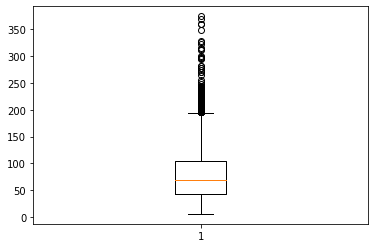

In [56]:
plt.boxplot(df.pre_clean_len)
plt.show()


check for any tweets greater than 140 characters

In [57]:
df[df.pre_clean_len > 140].head(10)

,sentiment,text,pre_clean_len
82,0,AWESOME romantic getaway this weekend! woohoo!...,141
213,0,"It is an cycle Im happy &amp; ready for bed, ...",141
493,4,@glitzyorbit Some suppliers wanted to take us ...,145
533,4,@robromoni you said &quot;you complete me!&quo...,157
552,4,I used the word cuss for lack of a better term...,146
580,0,3rd &amp; Pike smells like banana runts. Also...,141
627,4,Oh shout out 2 Justin &amp; Nick who waited @ ...,146
800,0,@Canageek ...profile page and hit &quot;older&...,145
802,4,@optimiced (Ð¼Ð¾Ñ?Ñ twti Ð¸Ð¼Ð¿Ð»Ð¸ÑÐ¸ÑÐ½Ð¾...,163
835,0,@RyanSeacrest Figures how does a Canadian get...,146


**removing outlier tweets**

Cleaning operations

Importing beautiful 

remove @ mentions from tweets

remove URLs from tweets

converting words like isn't to is not

get only text from the tweets

remove utf-8-sig code

converting all into lower case

will replace non-alphabetic characters by space

Word Punct Tokenize and only consider 

words whose length is greater than 1

join the words



In [58]:
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

In [59]:
pat1 = r'@[A-Za-z0-9_]+'        # remove @ mentions from tweets
pat2 = r'https?://[^ ]+'        # remove URLs from tweets
combined_pat = r'|'.join((pat1, pat2)) #addition of pat1 and pat2
www_pat = r'www.[^ ]+'         # remove URLs from tweets
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",   # converting words like isn't to is not
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

In [60]:
def tweet_cleaner(text):  # define tweet_cleaner function to clean the tweets
    soup = BeautifulSoup(text, 'lxml')    # create beautiful soup object
    souped = soup.get_text()   # get only text from the tweets 
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")    # remove utf-8-sig code
    except:
        bom_removed = souped
    stripped = re.sub(combined_pat, '', bom_removed) # calling combined_pat
    stripped = re.sub(www_pat, '', stripped) #remove URLs
    lower_case = stripped.lower()      # converting all into lower case
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case) # converting words like isn't to is not
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)       # will replace # by space
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1] # Word Punct Tokenize and only consider words whose length is greater than 1
    return (" ".join(words)).strip() # join the words

In [61]:
#Note that we have 1600000 instances. But processing so many instances will take a very very long time.
#Hence, restricting to rather 50000 instances.
limit=50000
import time; 
ms = time.time()
#nums = [0,400000,800000,1200000,1600000] # used for batch processing tweets
#nums = [0, 9999]
clean_tweet_texts = [] # initialize list
for i in range(0,limit): # batch process 1.6 million tweets 
    if i % 10000==0:
        print(i, time.time()-ms)
    clean_tweet_texts.append(tweet_cleaner(df['text'][i]))  # call tweet_cleaner function and pass parameter as all the tweets to clean the tweets and append cleaned tweets into clean_tweet_texts list

0 0.0001304149627685547
10000 2.705563545227051
20000 5.360196590423584
30000 7.989318132400513
40000 10.646017789840698


clean tweet texts

In [62]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

tokenize word in clean_tweet_texts and append it to word_tokens list

In [63]:
word_tokens = [] # initialize list for tokens
for word in clean_tweet_texts:  # for each word in clean_tweet_texts
    word_tokens.append(word_tokenize(word)) #tokenize word in clean_tweet_texts and append it to word_tokens list


Lemmatizing

In [64]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [65]:
df1 = [] # initialize list df1 to store words after lemmatization
from nltk.stem import WordNetLemmatizer # import WordNetLemmatizer from nltk.stem
lemmatizer = WordNetLemmatizer() # create an object of WordNetLemmatizer
for l in word_tokens: # for loop for every tokens in word_token
    b = [lemmatizer.lemmatize(q) for q in l] #for every tokens in word_token lemmatize word and giev it to b
    df1.append(b) #append b to list df1

In [66]:
clean_df1 =[] # initialize list clean_df1 to join word tokens after lemmatization
for c in df1:  # for loop for each list in df1
    a = " ".join(c) # join words in list with space in between and give it to a
    clean_df1.append(a) # append a to clean_df1

Cleaning df_1

In [67]:
clean_df = pd.DataFrame(clean_df1,columns=['text']) # convert clean_tweet_texts into dataframe and name it as clean_df
#clean_df['target'] = df.sentiment[:10000] # from earlier dataframe get the sentiments of each tweet and make a new column in clean_df as target and give it all the sentiment score
#clean_df

In [69]:
clean_df['clean_len'] = [len(t) for t in clean_df.text] # Again make a new coloumn in the dataframe and name it as clean_len which

In [70]:
target2 = [] # initialize list
for i in range(0,limit): # batch process 1.6 million tweets 
    target2.append(df['sentiment'][i])
clean_df['target']=target2
df.head()

,sentiment,text,pre_clean_len
0,4,"@kalyanp Well, she's cute so I'll take the com...",109
1,0,My fingers are cold,20
2,0,En el Punch Out ya me ganÃ³ el Rey Hippo,41
3,0,@FlissTee i am fine thanks - had a lovely week...,138
4,4,nothin getting readyy to go to my cuzins gradu...,60


In [71]:
X = clean_df.text # get all the text in x variable
y = clean_df.target # get all the sentiments into y variable
print(X.shape) #print shape of x
print(y.shape) # print shape of y
from collections import Counter
print(set(y)) # equals to list(set(words))
print(Counter(y).values())

(50000,)
(50000,)
{0, 4}
dict_values([25188, 24812])


Perform train and test split

X_train is the tweets of training data, X_test is the testing tweets which we have to predict, y_train is the sentiments of tweets in the traing data and y_test is the sentiments of the tweets which we will use to measure the accuracy of the model

In [72]:
from sklearn.model_selection  import train_test_split #from sklearn.cross_validation import train_test_split to split the data into training and tesing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 1) # split the data into traing and testing set where ratio is 80:20


Get Tf-idf object and save it as vect. We can select features from here we just have simply change
the ngram range to change the features also we can remove stop words over here with the help of stop parameter

In [73]:
vect = TfidfVectorizer(analyzer = "word", ngram_range=(1,3))

fit or training data tweets to vect

In [74]:
vect.fit(X_train) 
X_train_dtm = vect.transform(X_train)

In [75]:
X_test_dtm = vect.transform(X_test)

## **Naive Bayes**

In [76]:
from sklearn.naive_bayes import MultinomialNB # import Multinomial Naive Bayes model from sklearn.naive_bayes
nb = MultinomialNB(alpha = 10) # get object of Multinomial naive bayes model with alpha parameter = 10

In [77]:
nb.fit(X_train_dtm, y_train)# fit our both training data tweets as well as their sentiments to the multinomial naive bayes model

MultinomialNB(alpha=10, class_prior=None, fit_prior=True)

In [78]:
from sklearn.model_selection import cross_val_score  # import cross_val_score from sklear.model_selection
accuracies = cross_val_score(estimator = nb, X = X_train_dtm, y = y_train, cv = 10) # do K- fold cross validation on our traing data and its sentimenst with 10 fold cross validation
accuracies.mean() # measure the mean accuray of 10 fold cross validation

0.772225

predict the sentiments of testing data tweets

In [79]:
y_pred_nb = nb.predict(X_test_dtm)


measure the accuracy of our model on the testing data

In [81]:
from sklearn import metrics # import metrics from sklearn
metrics.accuracy_score(y_test, y_pred_nb)

0.7717

## **NAIVE BAYES ACCURACY - 0.7717**

plot the confusion matrix between our predicted sentiments and the original testing data sentiments

In [82]:
from sklearn.metrics import confusion_matrix # import confusion matrix from the sklearn.metrics
confusion_matrix(y_test, y_pred_nb)

array([[4137,  832],
       [1451, 3580]])

## **SVM**

In [88]:
from sklearn.svm import LinearSVC # import SVC model from sklearn.svm
svm_clf = LinearSVC(random_state=0) # get object of SVC model with random_state parameter = 0

In [89]:
svm_clf.fit(X_train_dtm, y_train)# fit our both traing data tweets as well as its sentiments to the SVC model

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
          verbose=0)

In [90]:
from sklearn.model_selection import cross_val_score  # import cross_val_score from sklear.model_selection
accuracies = cross_val_score(estimator = svm_clf, X = X_train_dtm, y = y_train, cv = 10)# do K- fold cross validation on our traing data and its sentimenst with 10 fold cross validation
accuracies.mean() # measure the mean accuray of 10 fold cross validation

0.7872

In [91]:
y_pred_svm = svm_clf.predict(X_test_dtm)  # predict the sentiments of testing data tweets

In [92]:
from sklearn import metrics  # import metrics from sklearn
metrics.accuracy_score(y_test, y_pred_svm)  # measure the accuracy of our model on the testing data

0.7899

# SVM ACCURACY - 0.7899

In [93]:
from sklearn.metrics import confusion_matrix # import confusion matrix from the sklearn.metrics
confusion_matrix(y_test, y_pred_svm)# plot the confusion matrix between our predicted sentiments and the original testing data sentiments

array([[4078,  891],
       [1210, 3821]])